In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

In [3]:
# Display basic info
print(df.head())  # First 5 rows
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Check for missing values

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

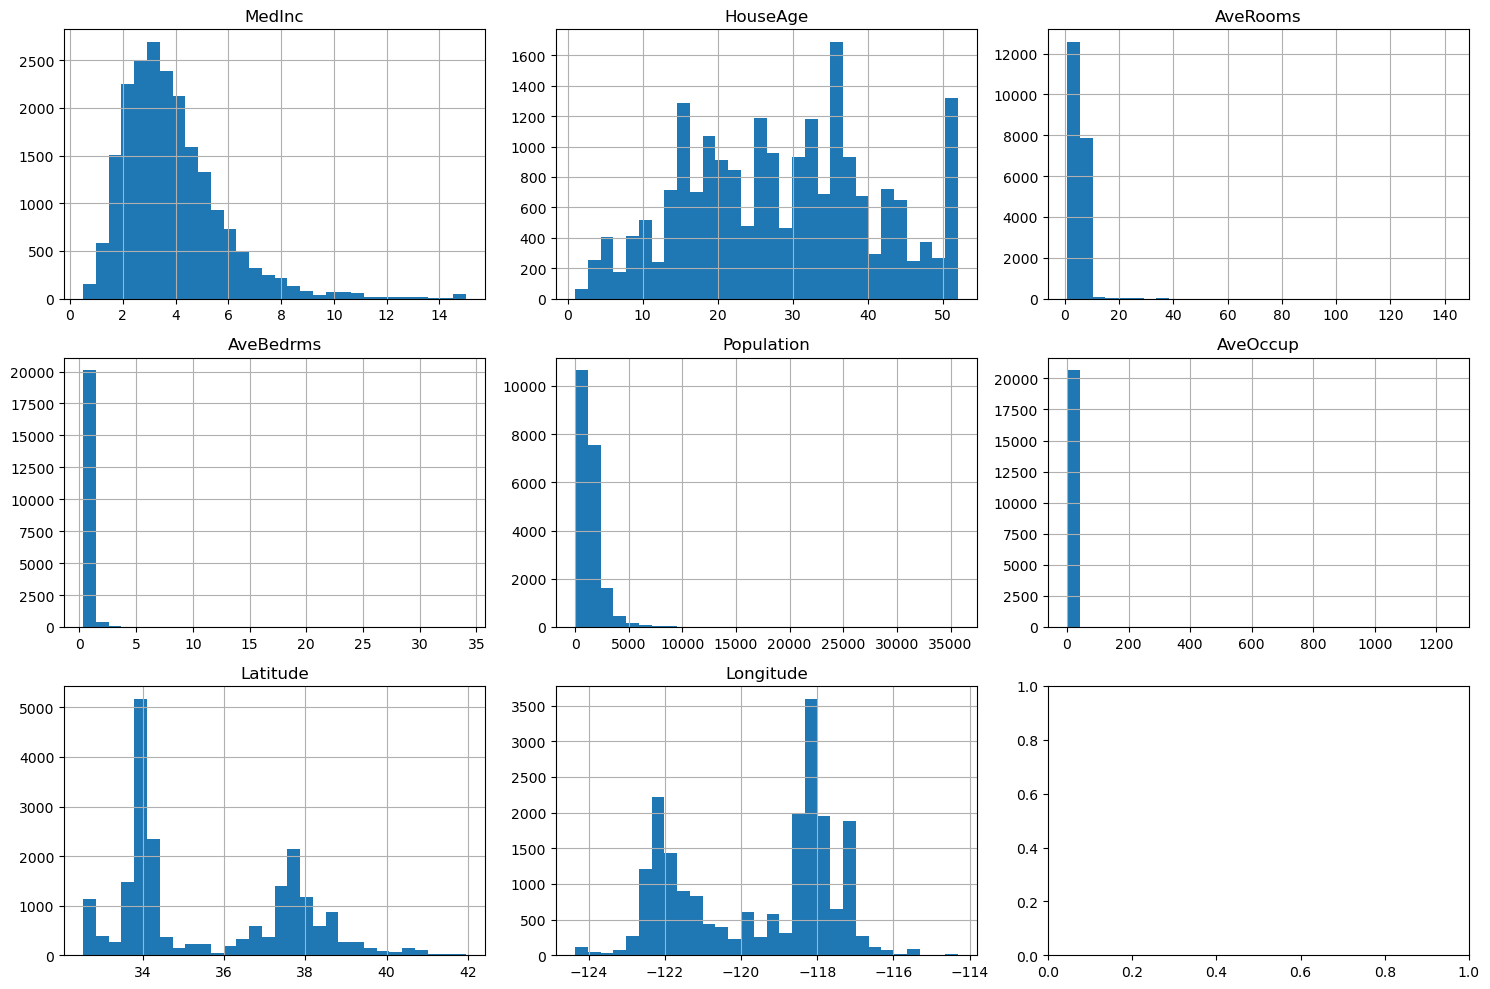

In [4]:
# Visualize feature distributions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    if col != 'PRICE':
        row, col_idx = i // 3, i % 3
        df[col].hist(bins=30, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(col)
plt.tight_layout()
plt.savefig('../images/feature_distributions.png')
plt.show()

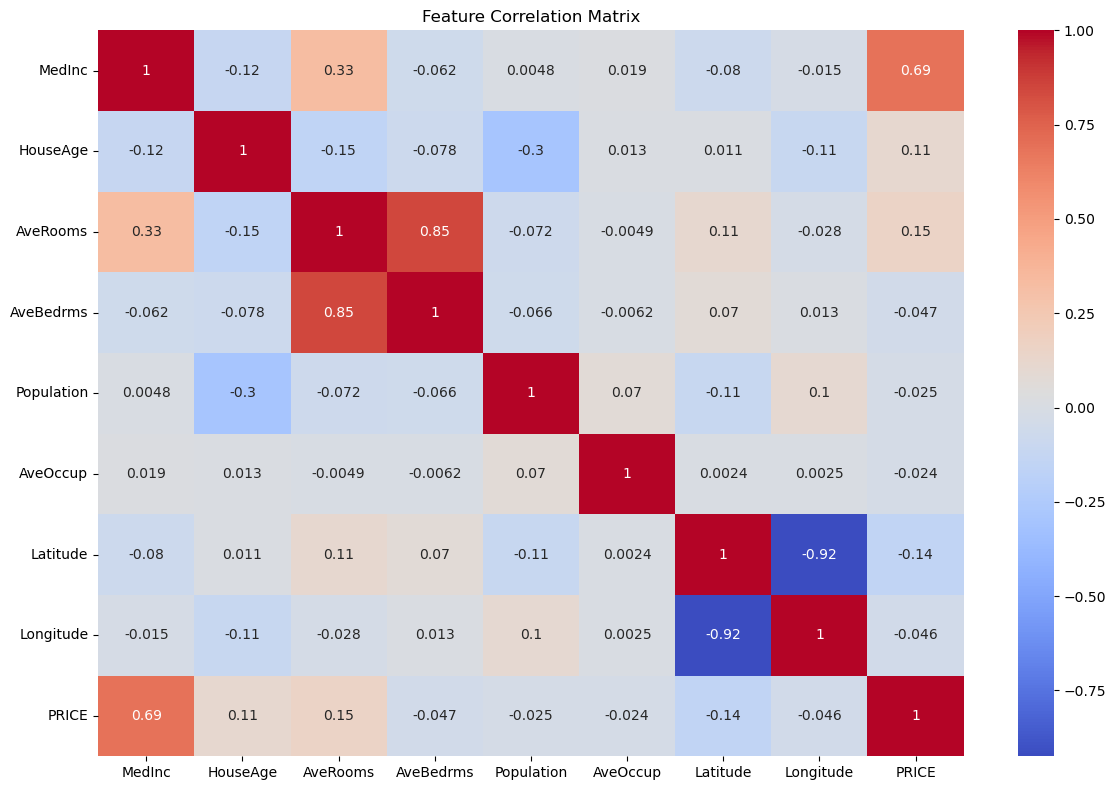

In [5]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../images/correlation_matrix.png')
plt.show()

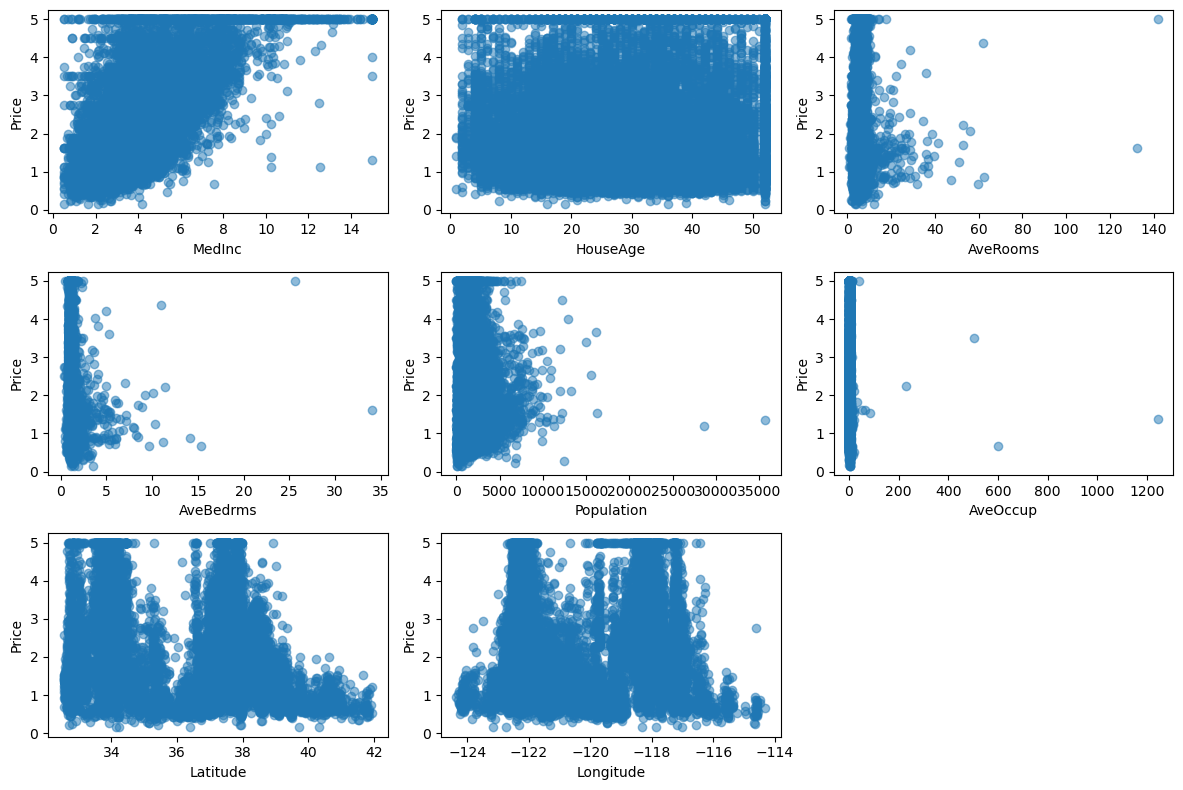

In [7]:
# Relationship with target variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[col], df['PRICE'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.savefig('../images/price_relationships.png')
plt.show()